In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/rupere/pb2_2_full.txt
/kaggle/input/rupere/pb2_1_full.txt
/kaggle/input/rupere1/pb2_3_full.txt


In [10]:
FILE_PATH_EN = '/kaggle/input/rupere/'
FILE_PATH_RO = '/kaggle/input/rupere1/'

In [11]:
def read_dict(filepath):
    D = {}
    with open(filepath, "r") as f:
        for line in f.readlines():
            elems = line.strip().split(' ')
            if len(elems) < 2:
                continue
            s = elems[1].lower()
            if s not in D.keys():
                D[s] = 0
            D[s] += int(elems[0])
    return D

In [12]:
D1 = read_dict(FILE_PATH_EN + "pb2_1_full.txt")
D2 = read_dict(FILE_PATH_EN + "pb2_2_full.txt")
D3 = read_dict(FILE_PATH_RO + "pb2_3_full.txt")

In [13]:
assert D1 != D2

In [14]:
def plot_word_distr(D):
    df = pd.DataFrame.from_dict(D, orient='index', columns=['cnt'])
    df.reset_index()
    df.sort_values(by=['cnt'], ascending=False).cumsum().plot()

## Cummulative distribution of words from the FIRST ENGLISH document
# BOOK: The Great Gatsby(Scott Fitzgerald)

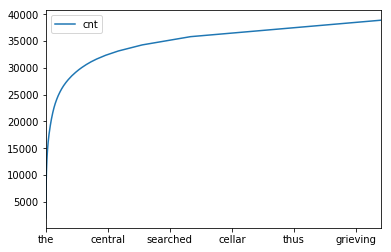

In [15]:
plot_word_distr(D1)

## Cummulative distribution of the SECOND ENGLISH document
NOTE: The book is trunkated to the number of words of the smallest book(i.e. The Great Gatsby)
# BOOK: The Alchemist(Paulo Coelho)

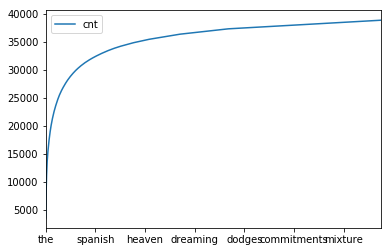

In [16]:
plot_word_distr(D2)

## Cummulative distribution of the ROMANIAN document
NOTE: The book is trunkated to the number of words of the smallest book(i.e. The Great Gatsby)
# BOOK: Enigma Otiliei(George Călinescu)

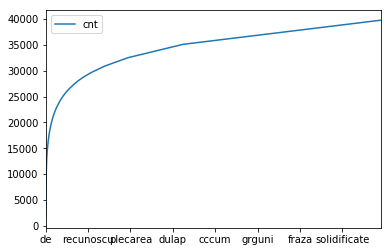

In [17]:
plot_word_distr(D3)

# It seems that all the distributions respect Zipf's law

In [19]:
def compute_perc(D):
    cnt = 0
    for k,v in D.items():
        if v == 1:
            cnt += 1
    return cnt * 1.0 / N

In [26]:
perc = compute_perc(D1)
print(f"Percentage of words appearing only once from all the words in the FIRST ENGLISH document {perc}")

Percentage of words appearing only once from all the words in the FIRST ENGLISH document 0.390126582278481


In [27]:
perc = compute_perc(D2)
print(f"Percentage of words appearing only once from all the words in the SECOND ENGLISH document: {perc}")

Percentage of words appearing only once from all the words in the SECOND ENGLISH document: 0.19632911392405064


In [28]:
perc = compute_perc(D3)
print(f"Percentage of words appearing only once from all the words in the ROMANIAN document: {perc}")

Percentage of words appearing only once from all the words in the ROMANIAN document: 0.5924050632911393
